In [11]:
import numpy as np
import pandas as pd
data = pd.read_csv("clevelanda (1).csv") 
data


,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [13]:
 data.isnull().any()

age         False
gender      False
cp          False
trestbps    False
chol        False
fps         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
class       False
dtype: bool

In [15]:
data.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'],
      dtype='object')

In [17]:
data.shape

(303, 14)

In [21]:
 data.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fps         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [23]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fps       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [25]:
data.dtypes

age           int64
gender        int64
cp            int64
trestbps      int64
chol          int64
fps           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
class         int64
dtype: object

In [27]:
data.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [33]:
data.iloc[:,0:5]

,age,gender,cp,trestbps,chol
0,63,1,1,145,233
1,67,1,4,160,286
2,67,1,4,120,229
3,37,1,3,130,250
4,41,0,2,130,204
...,...,...,...,...,...
298,45,1,1,110,264
299,68,1,4,144,193
300,57,1,4,130,131
301,57,0,2,130,236


In [35]:
data.iloc[0:5,0:5]

,age,gender,cp,trestbps,chol
0,63,1,1,145,233
1,67,1,4,160,286
2,67,1,4,120,229
3,37,1,3,130,250
4,41,0,2,130,204


In [39]:
data['class'].unique()


array([0, 2, 1, 3, 4], dtype=int64)

In [43]:
a=data['ca'].value_counts()
a

ca
0    176
1     65
2     38
3     20
?      4
Name: count, dtype: int64

In [47]:
pip install plotly-express

Note: you may need to restart the kernel to use updated packages.


In [53]:
#histogram
import plotly.express as px

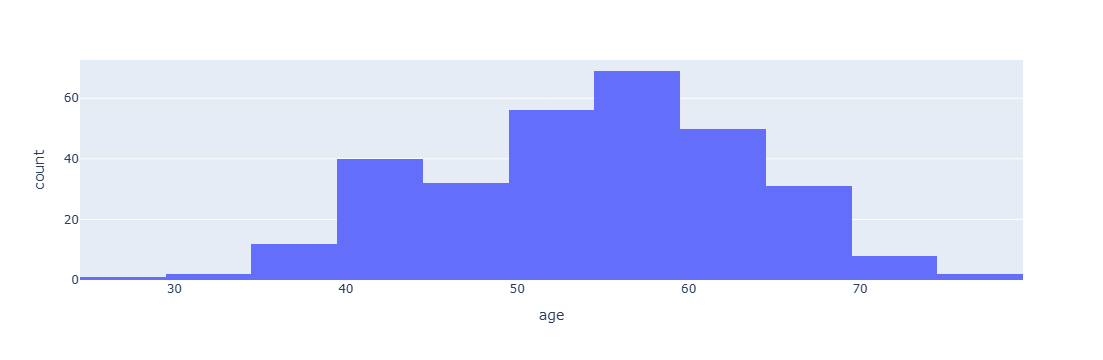

In [74]:
medical=px.histogram(data,x='age',nbins=10)
medical

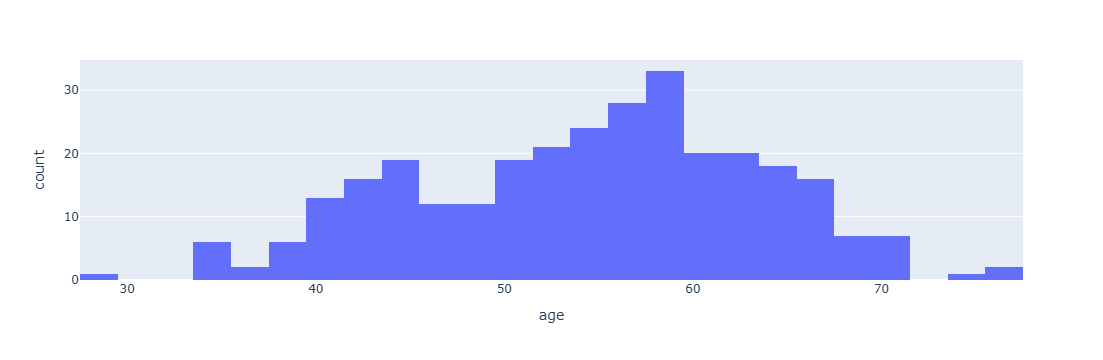

In [70]:
medical.show()

<Axes: >

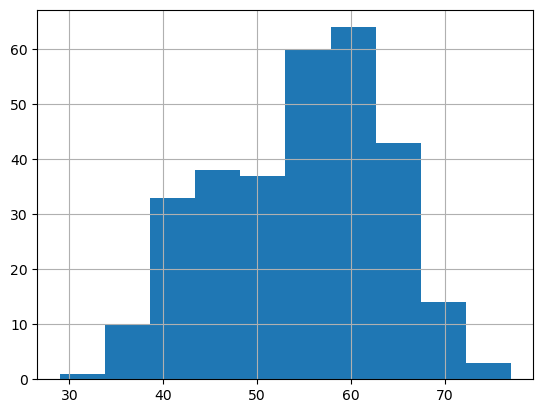

In [78]:
data['age'].hist()

In [101]:
cols_with_question_mark = []
for col in data.columns:
    if data[col].astype(str).str.contains(r'\?').any():
        cols_with_question_mark.append(col)

print("Columns containing '?' mark:", cols_with_question_mark)


Columns containing '?' mark: ['ca', 'thal']


In [107]:
for col in data.columns:
    # Replace '?' with NaN in the column
    data[col] = data[col].replace('?', np.nan)

# Print the updated DataFrame (optional)
print(data)

data.to_csv('clevelanda_updated.csv', index=False)

     age  gender  cp  trestbps  chol  fps  restecg  thalach  exang  oldpeak  \
0     63       1   1       145   233    1        2      150      0      2.3   
1     67       1   4       160   286    0        2      108      1      1.5   
2     67       1   4       120   229    0        2      129      1      2.6   
3     37       1   3       130   250    0        0      187      0      3.5   
4     41       0   2       130   204    0        2      172      0      1.4   
..   ...     ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45       1   1       110   264    0        0      132      0      1.2   
299   68       1   4       144   193    1        0      141      0      3.4   
300   57       1   4       130   131    0        0      115      1      1.2   
301   57       0   2       130   236    0        2      174      0      0.0   
302   38       1   3       138   175    0        0      173      0      0.0   

     slope   ca thal  class  
0        3    0    6 

In [134]:
data.replace('?', np.nan)

data['ca'] = pd.to_numeric(data['ca'], errors='coerce')

mean_value = data['ca'].mean()
print(f"Mean of 'ca' column: {mean_value}")


Mean of 'ca' column: 0.6722408026755853


In [130]:
median_value = data['ca'].median()
median_value

0.0

In [132]:
mode_value=data['ca'].mode()
mode_value

0    0.0
Name: ca, dtype: float64

In [142]:
mode_value=data['ca'].mode()[0]
data['ca']=data['ca'].fillna(mode_value)
print(data['ca'].unique())

[0 3 2 1]


In [146]:
data.replace('?', np.nan)

data['thal'] = pd.to_numeric(data['thal'], errors='coerce')

mean_value = data['thal'].mean()
print(f"Mean of 'thal' column: {mean_value}")


Mean of 'thal' column: 4.73421926910299


In [148]:
median_value = data['thal'].median()
median_value

3.0

In [150]:
mode_value=data['thal'].mode()
mode_value

0    3.0
Name: thal, dtype: float64

In [152]:
mode_value=data['thal'].mode()[0]
data['thal']=data['thal'].fillna(mode_value)
print(data['thal'].unique())

[6. 3. 7.]
